## Data Cleaning

In [23]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../SummerStudentAdmissions2.csv')
df.head(10)

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
5,NaN,California,3.80,1.2,NaN,95,0.0,4
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2
8,Admit,Florida,3.90,4.7,961.0,93,1.0,1
9,Admit,California,3.70,1.4,966.0,94,1.0,0


In [8]:
df.isna().sum()

Decision          1
State             0
GPA               1
WorkExp           0
TestScore         1
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [9]:
df = df[df['Decision'].notna()]
df.head(10)

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2
8,Admit,Florida,3.90,4.7,961.0,93,1.0,1
9,Admit,California,3.70,1.4,966.0,94,1.0,0
10,Admit,Florida,3.80,1.7,968.0,91,NaN,3


In [10]:
df.isna().sum()

Decision          0
State             0
GPA               1
WorkExp           0
TestScore         0
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [21]:
df = df.dropna()

In [20]:
# remove nonsensical answers in Decision
df['Decision'].unique()
df = df[df['Decision'] != 'Banana']
df.head()

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
6,Admit,California,3.88,1.5,967.0,95,1.0,5


In [13]:
# capitalize all states
df.State = df.State.str.capitalize()

## Visualizations

In [24]:
# Hide output with -q
!pip install -q altair

In [31]:
decision_count = df.groupby(['Decision', 'State']).size().reset_index()
decision_count = decision_count.rename(columns={0: 'Count'})
decision_count

,Decision,State,Count
0,Admit,California,9
1,Admit,Colorado,10
2,Admit,Florida,11
3,Admit,Utah,1
4,Decline,California,1
5,Decline,Colorado,6
6,Decline,Florida,13
7,Decline,Mississippi,1
8,Decline,Oregon,1
9,Decline,Utah,2


In [37]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).transform_filter(
    selection
).mark_bar().encode(
    alt.X('Decision:O', title='Decision'),
    alt.Y('Count:Q', title='Count'),
).add_selection(selection).interactive()
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [47]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# # Dropdown selection
# input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
# selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).mark_bar().encode(
    x=alt.X('Decision:O', title='Decision', axis=alt.Axis(labelAngle=0), sort='-y'),
    y=alt.Y('Count:Q', title='Count'),
    xOffset='State',
    color=alt.Color('State:N', sort=alt.EncodingSortField(field='Count', op='sum', order='descending'))#, scale=alt.Scale(scheme='inferno'))
)
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

alt.Chart(...)

array([[<Axes: title={'center': 'Admit'}>,
        <Axes: title={'center': 'Decline'}>],
       [<Axes: title={'center': 'Waitlist'}>, <Axes: >]], dtype=object)

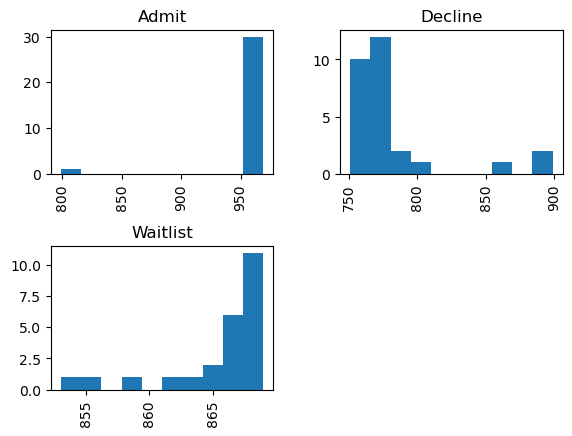

In [51]:
df.hist('TestScore', by='Decision')

[Text(0.5, 1.0, 'Histogram of Test Scores by Decision')]

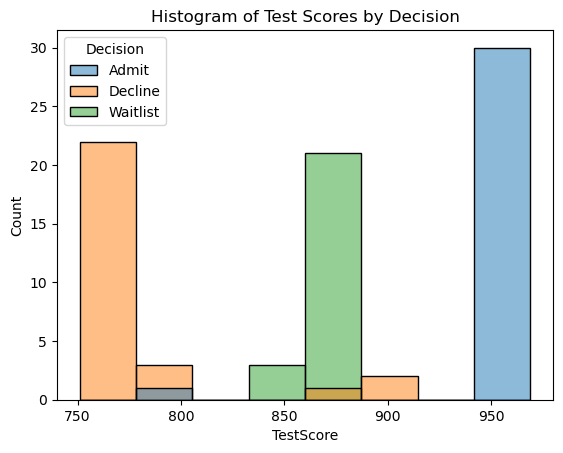

In [53]:
sns.histplot(x="TestScore", hue="Decision", data=df).set(title='Histogram of Test Scores by Decision')

In [66]:
# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

gpa_bar = alt.Chart(df).transform_filter(
    selection
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('GPA:Q'),
    alt.Y('count()', title='Count of Occurrences'),
    alt.Color('Decision:N')
).add_selection(selection).interactive()
chart_title = "Histogram of GPA by Decision Result for States"
gpa_bar = gpa_bar.properties(title=chart_title)

gpa_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)